## The Iris DataSet - Classifications

    Playing around with classifications of the Iris Dataset. This dataset is so popular that it is available as a part of the scikit-learn library.
    
**DataSet Description**

    A 150 samples of iris flower.
    Feature variables are sepal length, sepal width, petal length, petal width.
    One target variable specifying the species they belong to - Versicolor, Virginica, Setosa
    
**Approach**

    This is a supervised machine learning problem, where given a set of measurement we have to give it a species name. More specifically, a classification problem.
    
[Data School's YouTube resource - Video 1.](https://youtu.be/hd1W4CyPX58)

[Data School's YouTube resource - Video 2.](https://www.youtube.com/watch?v=RlQuVL6-qe8)

[Scikit-learn official example](https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html)

[KNeighborsClassifer Example](https://towardsdatascience.com/knn-using-scikit-learn-c6bed765be75)

#### **Imports**

In [41]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

iris = load_iris()

In [11]:
# print(type(iris)) # <class 'sklearn.utils.Bunch'>
# print(len(iris.data)) # 150
# print(iris.target_names) # ['setosa' 'versicolor' 'virginica']
# print(iris.feature_names) # ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

**Requirements for working with data in scikit-learn**
    
1. Features and response are separate objects
2. Features and response should be numeric
3. Features and response should be NumPy arrays
4. Features and response should have specific shapes

**response** is the target variable.

**features** are the values describing the response.

In [16]:
# Separate feature and target variables.

features_all = []
features = iris.data[: , [0,1,2,3]]

targets = iris.target
targets.reshape(targets.shape[0],-1)

for observation in features:
    features_all.append([observation[0] + observation[1] + observation[2] + observation[3]])

#### **Scatter Plots**

Text(0, 0.5, 'Targets')

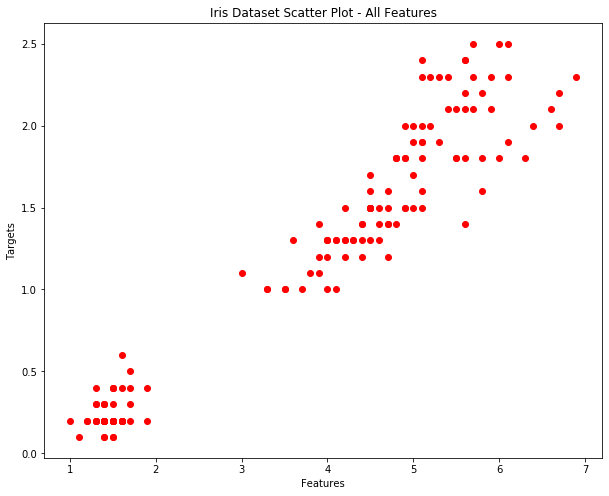

In [24]:
# Plot 1 - All Features

plt.scatter(features_all, targets, color='red', alpha =1.0)
plt.rcParams['figure.figsize'] = [10,8]
plt.title('Iris Dataset Scatter Plot - All Features')
plt.xlabel('Features')
plt.ylabel('Targets')

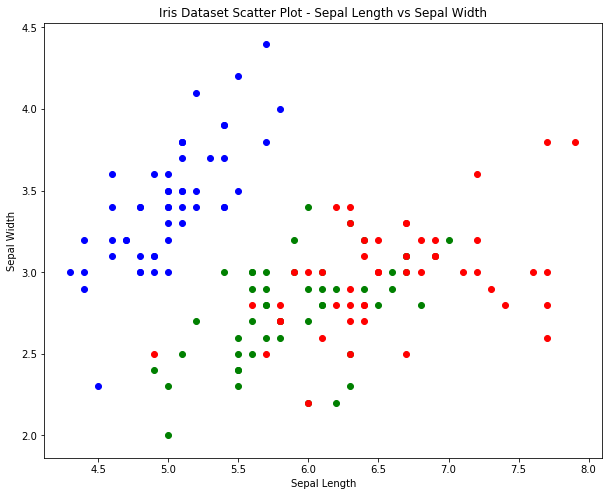

In [25]:
# Plot 2 - Relationship between Sepal Length and Sepal width

features_all = []
targets = []
for feature in features:
    features_all.append(feature[0]) #Sepal Length
    targets.append(feature[1]) #Sepal Width

groups = ('Iris-setosa','Iris-versicolor','Iris-virginica')
colors = ('blue', 'green','red')
data = ((features_all[:50], targets[:50]), (features_all[50:100], targets[50:100]), 
        (features_all[100:150], targets[100:150]))

for item, color, group in zip(data,colors,groups): 
    x, y = item
    plt.scatter(x, y,color=color,alpha=1)
    plt.title('Iris Dataset Scatter Plot - Sepal Length vs Sepal Width')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

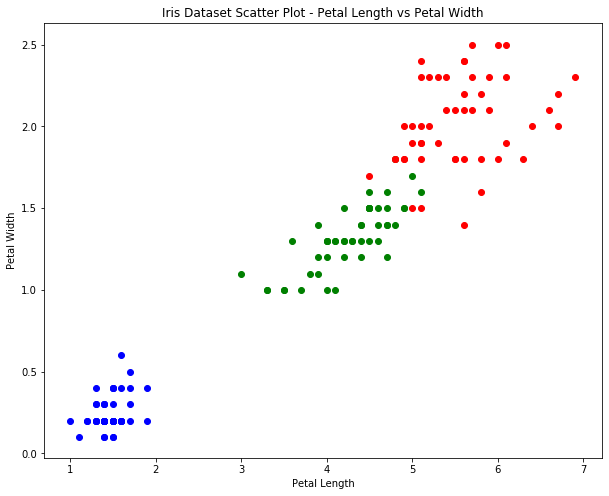

In [26]:
# Plot 3 - Relationship between Petal Length and Petal width

features_all = []
targets = []
for feature in features:
    features_all.append(feature[2]) #Petal Length
    targets.append(feature[3]) #Petal Width

groups = ('Iris-setosa','Iris-versicolor','Iris-virginica')
colors = ('blue', 'green','red')
data = ((features_all[:50], targets[:50]), (features_all[50:100], targets[50:100]), 
        (features_all[100:150], targets[100:150]))

for item, color, group in zip(data,colors,groups): 
    x, y = item
    plt.scatter(x, y,color=color,alpha=1)
    plt.title('Iris Dataset Scatter Plot - Petal Length vs Petal Width')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.show()

#### **k-NN Algorithm (k - Nearest Neighbors)**


**sklearn.neighbors** provides functionality for unsupervised and supervised neighbors-based learning methods. 

**Supervised neighbors-based learning** comes in two flavors: classification for data with discrete labels, and regression for data with continuous labels. 

**Unsupervised nearest neighbors** is the foundation of many other learning methods, notably manifold learningand spectral clustering.

KNN algorithm can also be used for regression problems.The only difference will be using averages of nearest neighbors rather than voting from nearest neighbors.

In [40]:
X = iris.data
y = iris.target

# Split dataset into 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

# print(X_train.shape)
# print(X_test.shape)
# print(y_train.shape)
# print(y_test.shape)

**Deciding on "k" factor**

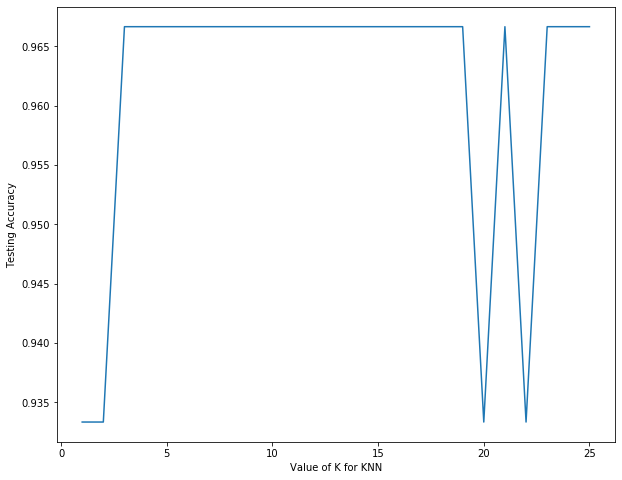

In [43]:
k_range = range(1, 26)
scores_list = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores_list.append(metrics.accuracy_score(y_test, y_pred))

# Plot the relationship between k and test score.
plt.plot(k_range, scores_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.show()

As we can see there is a raise and fall in the accuracy and it is quite typical when examining the model complexity with the accuracy. In general as the value of K increase there appears to be a raise in the accuracy and again it falls.

In general the Training accuracy rises as the model complexity increases, for KNN the model complexity is determined by the value of K. Larger K value leads to smoother decision boundary (less complex model). Smaller K leads to more complex model (may lead to overfitting). Testing accuracy penalizes models that are too complex(over fitting) or not complex enough(underfit). We get the maximum testing accuracy when the model has right level of complexity, in our case we can see that for a K value of 3 to 19 our model accuracy is 96.6%.

**For our final model we can choose a optimal value of K as 5 (which falls between 3 and 19) and retrain the model with all the available data. And that will be our final model which is ready to make predictions.**

In [46]:
# Fitting our model with k=5

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
print(y_pred)
score = metrics.accuracy_score(y_test, y_pred)
print(score)

[2 0 2 2 2 1 2 0 0 2 0 0 0 1 2 0 1 0 0 2 0 2 1 0 0 0 0 0 0 2]
0.9666666666666667


**Thus, we have a 96.66% accuracy score when k=5.**

Let's now try on some unseen random data, and see what prediction is made.

In [45]:
classes = {
    0: 'setosa',
    1: 'versicolor',
    2: 'virginica'
}

x_new = [[3, 4, 5, 2],[5, 4, 2, 2]]
y_predict = knn.predict(x_new)

print(classes[y_predict[0]])
print(classes[y_predict[1]])

versicolor
setosa
